In [90]:
import numpy as np
from tensorflow import keras
from keras import models
from keras.datasets import fashion_mnist

In [89]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
    ])


model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [91]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_18 (Flatten)        (None, 576)             

In [92]:
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [93]:
history = model.fit(
    train_images, 
    train_labels, 
    epochs=20,
    batch_size=64)

Epoch 1/20
938/938 [==============================] - 9s 9ms/step - loss: 0.5470 - accuracy: 0.7989
Epoch 2/20
938/938 [==============================] - 9s 9ms/step - loss: 0.3313 - accuracy: 0.8795
Epoch 3/20
938/938 [==============================] - 9s 9ms/step - loss: 0.2800 - accuracy: 0.8970
Epoch 4/20
938/938 [==============================] - 9s 9ms/step - loss: 0.2500 - accuracy: 0.9084
Epoch 5/20
938/938 [==============================] - 9s 9ms/step - loss: 0.2269 - accuracy: 0.9170
Epoch 6/20
938/938 [==============================] - 9s 9ms/step - loss: 0.2077 - accuracy: 0.9232
Epoch 7/20
938/938 [==============================] - 9s 9ms/step - loss: 0.1906 - accuracy: 0.9301
Epoch 8/20
938/938 [==============================] - 9s 9ms/step - loss: 0.1772 - accuracy: 0.9339
Epoch 9/20
938/938 [==============================] - 9s 9ms/step - loss: 0.1627 - accuracy: 0.9401
Epoch 10/20
938/938 [==============================] - 9s 9ms/step - loss: 0.1512 - accuracy: 0.9447

In [94]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


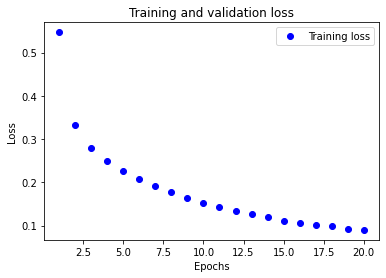

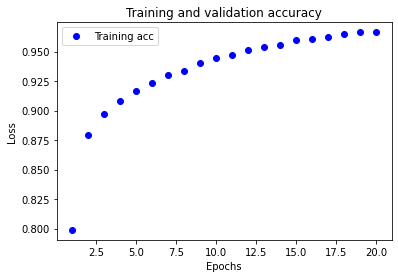

In [95]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
#val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
#val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
#plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [96]:
results = model.evaluate(test_images, test_labels)
print(results)

313/313 [==============================] - 2s 4ms/step - loss: 0.4009 - accuracy: 0.9003
[0.4009409546852112, 0.9003000259399414]


In [113]:
result = model.predict(test_images[189].reshape(1,28,28,1))
result1 = model.predict(test_images[514].reshape(1,28,28,1))
result2 = model.predict(test_images[1783].reshape(1,28,28,1))
print(result.argmax(), result1.argmax(), result2.argmax())
print(test_labels[189].argmax(), test_labels[514].argmax(), test_labels[1783].argmax())

7 9 2
7 9 2


In [104]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers

model1 = Sequential([
    Conv2D(32, (3,3), activation='sigmoid', input_shape=(28,28,1)),
    
    Conv2D(64, (3,3), activation = 'sigmoid'),
    
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
    ])


model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model1.fit(
    train_images, 
    train_labels, 
    epochs=10,
    batch_size=64)

Epoch 1/10
938/938 [==============================] - 16s 16ms/step - loss: 2.3250 - accuracy: 0.0973
Epoch 2/10
938/938 [==============================] - 15s 16ms/step - loss: 2.3027 - accuracy: 0.0995
Epoch 3/10
938/938 [==============================] - 16s 17ms/step - loss: 2.3027 - accuracy: 0.0984
Epoch 4/10
938/938 [==============================] - 15s 16ms/step - loss: 2.3027 - accuracy: 0.0998
Epoch 5/10
938/938 [==============================] - 15s 16ms/step - loss: 2.3027 - accuracy: 0.0986
Epoch 6/10
938/938 [==============================] - 15s 16ms/step - loss: 2.3027 - accuracy: 0.0989
Epoch 7/10
938/938 [==============================] - 15s 16ms/step - loss: 2.3027 - accuracy: 0.0985
Epoch 8/10
938/938 [==============================] - 15s 16ms/step - loss: 2.3027 - accuracy: 0.0980
Epoch 9/10
938/938 [==============================] - 15s 16ms/step - loss: 2.3027 - accuracy: 0.0982
Epoch 10/10
938/938 [==============================] - 15s 16ms/step - loss: 2.302

В чум причина не обучения сети? Такая же структура как в первом варианте, кроме слоев MaxPooling

In [106]:
model1.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_57 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_58 (Conv2D)          (None, 22, 22, 64)        36928     
                                                                 
 flatten_19 (Flatten)        (None, 30976)             0         
                                                                 
 dense_38 (Dense)            (None, 64)                1982528   
                                                                 
 dense_39 (Dense)            (None, 10)                650       
                                                                 
Total params: 2,038,922
Trainable params: 2,038,922
N